# Modified 2b DL1r

This is just a copying of my other notebook `Modified-2b` to repeat the analysis of modifying the 2b inputs to make the 2b and 4b kinematics *more similar* before reweighting, but this time on samples with the new b-taggers.

Since the $n_{jets}$ variable is important for accurately modelling the background kinematics, I'm going to use the number of jets fed into pairAGraph to define these templates, and derive these histograms in the CR, and evalutate how well they e

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import uproot
import os
import json

from preprocess import jetVars

%load_ext autoreload
%autoreload 2

In [2]:
nSelectedJets = 5

sigSubDir = f'SMNR_mc16a_PFlow-MAR2020-{nSelectedJets}jets'
bkgSubDir = f'data16_PFlow-FEB20-{nSelectedJets}jets'

In [3]:
# sFile = f"../data/{sigSubDir}/test_df_f_3b_scaledInputs_withCuts.h5"
# sig_df = pd.read_hdf(sFile, key='df')

print('Reading in 3b')
bdf_3b = pd.read_hdf(f"../data/{bkgSubDir}/df_last_hp_3b.h5",key='df')
print('Reading in 2b')
bdf_2b = pd.read_hdf(f"../data/{bkgSubDir}/df_last_hp_2b.h5",key='df')

print('Applying cuts')
# Apply the cuts up to Xwt
for bdf in [bdf_2b,bdf_3b]:
    bdf['deta_hh'] = np.abs(bdf.eta_h1-bdf.eta_h2)
    bdf['cut_deta_hh'] = (bdf.deta_hh < 1.5) 
    bdf['cut_Xwt'] = (bdf.X_wt > 1.5) 


Reading in 3b
Reading in 2b
Applying cuts


In [4]:
dataText = "$\mathbf{ATLAS}$ data Internal\n"
dataText += "2016 data FEB2020 MNT prod\n"
dataText += "DL1r 77% WP with pairAGraph"

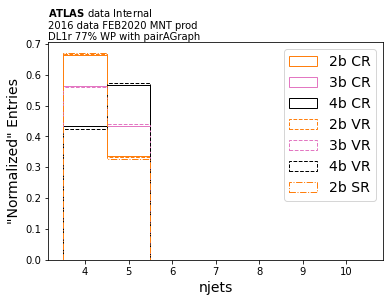

In [5]:
for r, region,ls in zip([2,1,0],['CR','VR','SR'],['-','--','-.']):

    plt.hist(bdf_2b.loc[bdf_2b.kinematic_region == r,'njets'],
             7,(3.5,10.5),
             histtype='step',color='C1',linestyle=ls,label=f'2b {region}',density=True)

    if r==0:
        continue
    
    plt.hist(bdf_3b.loc[(bdf_3b.ntag==3)&(bdf_3b.kinematic_region == r),'njets'],
             7,(3.5,10.5),
             histtype='step',color='C6',linestyle=ls,label=f'3b {region}',density=True)

    plt.hist(bdf_3b.loc[(bdf_3b.ntag>=4)&(bdf_3b.kinematic_region == r),'njets'],
             7,(3.5,10.5),
             histtype='step',color='k',linestyle=ls,label=f'4b {region}',density=True)

plt.xlabel('njets',fontsize=14)
plt.ylabel('"Normalized" Entries',fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/njets_234b_CVSR.pdf',bbox_inches='tight')

plt.show()

**Should I make this after the $\Delta \eta_{hh}$ cut?**

Maybe, if I'm reweighting after $\Delta \eta_{hh} < 1.5$??

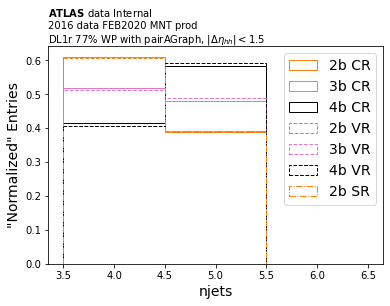

In [6]:
for r, region,ls in zip([2,1,0],['CR','VR','SR'],['-','--','-.']):

    plt.hist(bdf_2b.loc[(bdf_2b.kinematic_region == r) & bdf_2b.cut_deta_hh,'njets'],
             3,(3.5,6.5),
             histtype='step',color='C1',linestyle=ls,label=f'2b {region}',density=True)

    if r==0:
        continue
    
    plt.hist(bdf_3b.loc[(bdf_3b.ntag==3)&(bdf_3b.kinematic_region == r)  & bdf_3b.cut_deta_hh,'njets'],
             3,(3.5,6.5),
             histtype='step',color='C6',linestyle=ls,label=f'3b {region}',density=True)

    plt.hist(bdf_3b.loc[(bdf_3b.ntag>=4)&(bdf_3b.kinematic_region == r)  & bdf_3b.cut_deta_hh,'njets'],
             3,(3.5,6.5),
             histtype='step',color='k',linestyle=ls,label=f'4b {region}',density=True)

plt.xlabel('njets',fontsize=14)
plt.ylabel('"Normalized" Entries',fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
plt.text(0,1,dataText+', $|\Delta \eta_{hh}| < 1.5$',ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/njets_234b_CVSR_deta_hh.pdf',bbox_inches='tight')

plt.show()

**Question:** Why isn't there a smoothly varying trend from 4b, 3b, 2b?

I think because this plot means that 2b is a compromise between the 3 and 4b distributions - which makes sense in some sense b/c we trained on 3+4b.


Another note - you can see that 2b is showing the most discrepancies b/w the regions while the 3b and 4b kinematics look more constant?

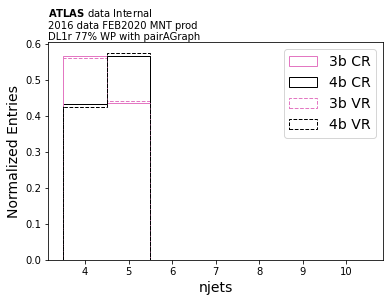

In [7]:
for r, region,ls in zip([2,1],['CR','VR'],['-','--']):


    plt.hist(bdf_3b.loc[(bdf_3b.ntag==3)&(bdf_3b.kinematic_region == r),'njets'],
                 7,(3.5,10.5),
                 histtype='step',color='C6',linestyle=ls,label=f'3b {region}',density=True)

    plt.hist(bdf_3b.loc[(bdf_3b.ntag>=4)&(bdf_3b.kinematic_region == r),'njets'],
             7,(3.5,10.5),
             histtype='step',color='k',linestyle=ls,label=f'4b {region}',density=True)

plt.xlabel('njets',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/njets_34b_CVR.pdf',bbox_inches='tight')

plt.show()

Ok, my take away message from this plot is that the shape of this variable in the CR is a good model for the VR, and ergo will hopefully also be indicative of the SR!

(I could make a ratio plot of VR / CR for each of the b-tag categories...)


**Next:** Plot the PC scores in each of these `njets` bins.

In [ ]:
bdf_2b.columns

In [ ]:
bdf_2b.head()

**How to get these templates correctly**

I just need to pseudo-tag 2 of the jets in the 2b sample, so the logic below takes care of that, which I need to consider separately depending on how many jets are going into these histograms.

[0.         0.         0.14569476 0.14464249 0.70966275]
[0.         0.         0.14569476 0.14464249 0.70966275]
[0.18505802 0.00920362 0.12904944 0.12177714 0.55491178]
[0.31754084 0.01579249 0.12713812 0.11997353 0.54669313]


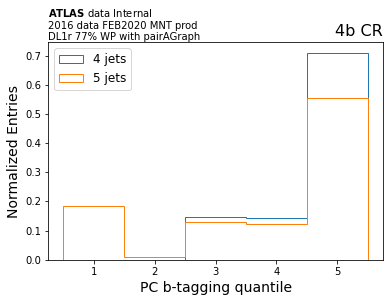

In [8]:
Db_4b = {}

for nj in range(4,nSelectedJets+1):

    # I will also need a mask for the jets in the event, similar to how I made masks for the tracks    
    evtMask = (bdf_3b.kinematic_region==2) & (bdf_3b.njets == nj) & (bdf_3b.ntag >= 4)
    jet_cols = [f'ml_j{ji}_Db' for ji in range(nj)]
    Db = bdf_3b.loc[evtMask,jet_cols].values + 3
    
    # I need the jet mask to avoid plotting the *masked* values
    n,_,_ = plt.hist(Db.flatten(), 5,(0.5,5.5),density=True,
                     label=f'{nj} jets',histtype='step')
    
    print(n)
    if nj == nSelectedJets:
        w1 = np.sum(n[:2])
        w2 = np.sum(n[3:])

        n = np.concatenate((n[:2]/w1, 2*n[2:]/w2))/3
    print(n)   
    # Save the PT template
    Db_4b[nj] = list(n) 

plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.title('4b CR',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(loc='upper left',fontsize=12)
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/Db_njets_4b_CR.pdf',bbox_inches='tight')

plt.show()

# Write to a .json file 
# filename = "Db_njets_4b_CR.json"
# with open(filename, 'w') as varfile:
#     json.dump(Db_4b, varfile)


At first I was confused if I wanted to subtract the 2b histogram from the 4b histogram, so the plots below are just demonstrating that the PC templates tend to be the same so matter *what* region of the massplane you're in.

In [ ]:
Db_4b[4]

In [ ]:
for i,nj in enumerate(range(4,nSelectedJets+1)):
     
    for r, region,ls in zip([0,1,2,-1],['SR','VR','CR','other'],['-.','--','-','dotted']):
        
        evtMask = (bdf_2b.kinematic_region==r) & (bdf_2b.njets == nj) 
        jet_cols = [f'ml_j{ji}_Db' for ji in range(nj)]
        Db = bdf_2b.loc[evtMask,jet_cols].values + 3
        
        n,_,_ = plt.hist(Db.flatten(), 5,(0.5,5.5),density=True,
                         color=f'C{i}',linestyle=ls,
                         label=f'{nj} jets {region}',histtype='step')
        
        print(nj,n)
plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.title('2b',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(bbox_to_anchor=(1,1.03))
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/Db_njets_2b_fullmassplane.pdf',bbox_inches='tight')

plt.show()


Ok - awesome, this is all I wanted, to see that the 2b distributions are pretty constant across the `njets` bins.

Just to sanity check things, make the same plot for 4b (just to make sure that you're not crazy, lol)

In [ ]:
for i,nj in enumerate(range(4,nSelectedJets+1)):

    for r, region,ls in zip([1,2,-1],['VR','CR','other'],['--','-','dotted']):
        
        evtMask = (bdf_3b.kinematic_region==r) & (bdf_3b.njets == nj) & (bdf_3b.ntag >= 4)
        jet_cols = [f'ml_j{ji}_Db' for ji in range(nj)]
        Db = bdf_3b.loc[evtMask,jet_cols].values + 3
        
        # I need the jet mask to avoid plotting the *masked* values
        n,_,_ = plt.hist(Db.flatten(), 5,(0.5,5.5),density=True,
                         color=f'C{i}',linestyle=ls,
                         label=f'{nj} jets {region}',histtype='step')
        
plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.title('4b',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(bbox_to_anchor=(1,1.07))
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/Db_njets_4b_notSR.pdf',bbox_inches='tight')

plt.show()


Ok, these two plots make me feel pretty comfortable about my methodology moving forward!

Sanity check - let's look at 3b as well.

In [ ]:
for nj in range(4,nSelectedJets+1):
     
    evtMask = (bdf_3b.kinematic_region==2) & (bdf_3b.njets == nj) & (bdf_3b.ntag == 3)
    jet_cols = [f'ml_j{ji}_Db' for ji in range(nj)]
    Db = bdf_3b.loc[evtMask,jet_cols].values + 3
    
    plt.hist(Db.flatten(), 5,(0.5,5.5),density=True,
             label=f'{nj} jets',histtype='step')

plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.title('3b CR',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(loc='upper center',fontsize=12)
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{bkgSubDir}/Db_njets_3b_CR.pdf',bbox_inches='tight')

plt.show()

**Modify the 2b data**

- I think I can just use the `Db_4b` dictionary, but for putting this logic in the `preprocess.py` I'll need to load in the scaling file.

**Plan:** Save to `new_ml_jet{i}_Db`, although in the `transformData` function, I'll rewrite the `ml_jet{i}_Db` column, and just save the `jet{i}_Db` column for reference for what the 2b quantiles looked like before.


In [ ]:
Db_cols

In [ ]:
new_Db_cols = [f'new_{c}' for c in Db_cols]

for i in range(nSelectedJets):
    
    c = f'new_ml_j{i}_Db'
    bdf_2b[c] = bdf_2b[f'ml_j{i}_Db']    

Note - the jets are now ordered by $p_T$ - *not* $D_b$.

In [ ]:
0.47819917 +0.02180083 

In [ ]:
0.03945072+ 0.05696591+ 0.40358336

In [ ]:
for nj in range(4,nSelectedJets+1):
     
    evtMask = (bdf_2b.njets == nj) 
    N = np.sum(evtMask)

    for c in range(nj):
        bdf_2b.loc[evtMask,c] = np.random.choice(np.arange(-2,3), N, p=Db_4b[nj])

In [ ]:
for i,nj in enumerate(range(nSelectedJets)):
     
    
    mask_4b = (bdf_3b.kinematic_region==2) & (bdf_3b.njets == nj) & (bdf_3b.ntag >= 4)
    mask_2b = bdf_2b.njets == nj 
    
    # I will also need a mask for the jets in the event, similar to how I made masks for the tracks
    Db = jetInputs[mask_4b,:,-1]+2.5
    
    # I need the jet mask to avoid plotting the *masked* values
    n,_,_ = plt.hist(Db[jetMask[mask_4b]], 5,(0.5,5.5),density=True,
                     label=f'{nj} jets: 4b',histtype='step')
    
    n_2b,_ = np.histogram(bdf_2b.loc[mask_2b,new_Db_cols[:nj]].values+3,
                          5,(0.5,5.5),density=True)
    print(n_2b)
    plt.plot(np.arange(1,6),n_2b,color=f'C{i}',marker='o',
             linewidth=0, label=f'{nj} jets: 2b')
    
plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.title('pseudo tagged 2b',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(bbox_to_anchor=(1,1.03),fontsize=12)
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

#plt.savefig(f'figures/{bkgSubDir}/Db_njets_4b_CR_2b_PT.pdf',bbox_inches='tight')

plt.show()


In [ ]:
for i,nj in enumerate(njetsRange):
     
    if nj == njetsRange[-1]:
        njmask = (df.njets >= nj)
    else:
        njmask = (df.njets == nj)
    
    
    mask_4b = (df.kinematic_region==2) & njmask & (df.ntag >= 4)
    mask_2b = njmask & (df.ntag == 2)
    
    
    # I will also need a mask for the jets in the event, similar to how I made masks for the tracks
    Db = jetInputs[mask_4b,:4,-1]+2.5
    
    # I need the jet mask to avoid plotting the *masked* values
    n,_,_ = plt.hist(Db[jetMask[mask_4b,:4]], 5,(0.5,5.5),density=True,
                     label=f'{nj} jet events - 4b-jets in 4b',histtype='step')
    

    n_2b,_ = np.histogram(jetInputs[mask_2b,:2,-1]+2.5,
                          5,(0.5,5.5),density=True)
    print(n_2b)
    plt.plot(np.arange(1,6),n_2b,color=f'C{i}',marker='o',
             linewidth=0, label=f'{nj} jets - 2b-jets in 4b')
    
plt.xlabel('PC b-tagging quantile',fontsize=14)
plt.ylabel('Normalized Entries',fontsize=14)
plt.title('b-jets in 2b and 4b',loc='right',fontsize=16)
ax = plt.gca()

plt.legend(bbox_to_anchor=(1,1.03),fontsize=12)
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

#plt.savefig(f'figures/{bkgSubDir}/Db_njets_4b_CR_2b_PT.pdf',bbox_inches='tight')

plt.show()


In [ ]:
jetInputs[mask_2b,:2,-1].shape

Something seems *fucked* atm, all of these jets *should* have been in Q4 and Q5 (for 70% WP 2b).

Maybe the jets are sorted by $p_T$ and not $D_b$?

In [ ]:
jetInputs[mask_2b,:,-1]+2.5

In [ ]:
jetInputs[mask_4b,:,-1]+2.5

Ok, but I think this plot is demonstrating pretty clearly that the issue w/ the 2b sample I've made is *not* with the templates that I've made, it seems to be with the underlying 2b distribuion.
- Check my edges for MV2c10
- I could also try to calculate some signal efficiencies with these edges?

In [ ]:
sum([0.27890654, 0.06815653, 0.03483192, 0.12595167, 0.49215333])

Ok, interesting - this is quite a bit worse than I was expecting it would be, but it's sitll better than it would have been for 2b (I guess) 

Worth implementing and trying out the background estimate!!

I think a nice way to sanity check this method is to overlay histograms for the 4b CR with the 2b fullmassplane!

Ok, after I've played w/ the syntax, I think I should 
- Copy it over to the `getHCs` function in the `preprocess.py` module
- Test running over period A
- Submit all the jobs
- Check the massplane
- Try to get a background estimate

In [ ]:
tag = '_PT_2b'
fDir = f"../data/{bkgSubDir}/"
fout = f"{fDir}df_f_0.22{tag}.h5"

periods = ['A','B','C','D','E','F','G','H','I','J','K','L']

if reload:
    dfs = []

    for period in periods:

        print('period',period)
        fName = f"files/df_period{period}_f_0.22{tag}.h5"

        if os.path.exists(fDir+fName):
            dfi = pd.read_hdf(fDir+fName,key='df')
            dfi['period'] = period
            dfs.append(dfi)
        else:
            print(fDir+fName)

    df_pt = pd.concat(dfs,ignore_index=True)
    df_pt.to_hdf(fout,key='df',mode='w')
    
else:
    df_pt = pd.read_hdf(fout,key='df')

Look at the massplanes

In [ ]:
os.sys.path.append('../eda_tools')
from plot_helper import massplane

In [ ]:
df_pt.columns

In [ ]:
df_pt['deta_hh'] = np.abs(df_pt.eta_h1 - df_pt.eta_h2)
df_pt['cut_deta_hh'] = (df_pt['deta_hh'] < 1.5)
df_pt['cut_Xwt'] = (df_pt['X_wt'] > 1.5)

In [ ]:
(df_pt.ntag==2)

In [ ]:
kwargs = {'figsize': (10, 8),
           'bins' : (125, 125),
           'xrange': (25, 275),
           'yrange': (25, 275),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': 'pairAGraph: just pairing',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'filename': f'{fDir}/{bkgSubDir}/massplane_4jetsGNN_2b.pdf',
           'alpha': 0.7,
           'save': False,
           'show': True
          }

mask = np.ones_like(df_pt.index).astype(bool)

masks = [(df_pt.ntag==2), df_pt.cut_deta_hh, df_pt.cut_Xwt ]

title = '2b PT pairAGraph: '

for m,ID in zip(masks,['after pairing', '$|\Delta \eta_{hh}| < 1.5$', '$X_{wt}$>1.5']):
    
    mask = mask & m
    
    # Modify the title and figure name
    kwargs['title'] = title+ID
    
    fig = massplane(df_pt.loc[mask,'m_h1'],
                    df_pt.loc[mask,'m_h2'],**kwargs)

    fig.show()

I already calculated the 3b and 4b masks in another nb, and since nothing changed w/r.t. that, no need to recalculate them here!

Recheck the 2b cutflow $m_{hh}$ plot

In [ ]:
density=False

plt.hist(df_pt.loc[df_pt.ntag==2,'m_hh'],100,(0,1250),histtype='step',label='4 jets from pairAGraph',
         color='darkorange',density=density)
# plt.hist(df_pt.loc[(df_pt.ntag==2)&(df_pt.MDR),'m_hh'],100,(0,1250),histtype='step',label='MDR',
#          color='cornflowerblue',density=density)
# plt.hist(df_pt.loc[(df_pt.ntag==2)&df_pt.MDpT,'m_hh'],100,(0,1250),histtype='step',label='MD$p_T$',
#          color='green',density=density)
plt.hist(df_pt.loc[(df_pt.ntag==2)&df_pt.cut_deta_hh,'m_hh'],100,(0,1250),histtype='step',label='$|\Delta \eta_{hh}|$  < 1.5',
         color='red',density=density)
plt.hist(df_pt.loc[(df_pt.ntag==2)&df_pt.cut_deta_hh&df_pt.cut_Xwt,'m_hh'],100,(0,1250),histtype='step',label='$X_{wt}$ > 1.5',
         color='navy',density=density)
plt.hist(df.loc[(df_pt.ntag==2)&df_pt.cut_deta_hh&df_pt.cut_Xwt & (df_pt.kinematic_region==0),'m_hh'],100,(0,1250),histtype='step',label='$X_{hh}$ < 1.6',
         color='C4',density=density)

plt.xlabel('$m_{4j}$ [GeV]',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.legend(fontsize=11)

ax = plt.gca()
plt.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

#plt.savefig(f'{figDir}/m4j_allCuts.pdf',bbox_inches='tight')

plt.show()


In [ ]:
df_pt.columns

In [ ]:
from NN_RW import getNNweights

In [ ]:
modelName = f"NN_rw/{bkgSubDir}/xformer_train_SMNR_mc16ade/afterPairing_PT_2b.h5"

X_all = getNNweights(df_pt, kinematic_region=2,epochs = 50, patience=10,
             train=False, key="w_2b_afterPairing",modelName=modelName)

I *have* a background estimate now!!

So now I just need to 
1. Evaluate it - and -
2. Get the limits

In [ ]:
rw_vars = ['njets','pT_4', 'pT_2', 'dRjj_1', 'dRjj_2','eta_i','pt_hh','m_hh']
nBins = [8]+[50]*7
myRanges = [(3.5,12.5),(0,125),(0,200),(0,4),(0,4),(0,2.5),(0,400),(0,1000)]

In [ ]:
text = '$\mathbf{ATLAS}$ 2016 data Internal\n'
text += 'MAY 2019 MNT prod\n'
text += 'MV2c10 70% WP with pairAGraph'

In [ ]:
bkgSubDir

In [ ]:
for region, title,tag in zip([2,1],['Control Region','Validation Region'],['CR','VR']):

    mask = df_pt.MDpT & (df_pt.kinematic_region==region)
    
    for c,n,r in zip(rw_vars,nBins,myRanges):

        plt.figure()
        plt.hist(df_pt.loc[(df_pt.ntag==2) & mask & df_pt.cut_deta_hh,c], 
                 n, r, color='navy',
                 histtype='step',label='Cut $|\Delta \eta_{hh}|$: rw 2b',
                 weights=df_pt.loc[(df_pt.ntag==2) & mask & df_pt.cut_deta_hh,'w_2b_afterPairing'])
        plt.hist(df_pt.loc[(df_pt.ntag==2) & mask & (~df_pt.cut_deta_hh),c], 
                 n, r, color='C3',linestyle='--',
                 histtype='step',label='$|\Delta \eta_{hh}|$ > 1.5: rw 2b',
                 weights=df_pt.loc[(df_pt.ntag==2) & mask & (~df_pt.cut_deta_hh),'w_2b_afterPairing'])    

        plt.hist(df_pt.loc[(df_pt.ntag>=4) & mask & df_pt.cut_deta_hh,c],
                 n,r,color='k',
                 histtype='step',label='$Cut |\Delta \eta_{hh}|$: 4b')
        plt.hist(df_pt.loc[(df_pt.ntag>=4) & mask & (~df_pt.cut_deta_hh),c],
                 n,r,color='k',linestyle='--',
                 histtype='step',label='$|\Delta \eta_{hh}|$ > 1.5: 4b')

        plt.xlabel(c,fontsize=14)
        plt.ylabel('Entries',fontsize=14)
        plt.legend(fontsize=12,loc='best')
        plt.title(title,loc='right',fontsize=16)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        #plt.savefig(f'figures/dl1r_77/rw_figs/{c}_cf_deta_hh_cut.pdf',bbox_inches='tight')
        plt.show()

In [ ]:
175/125

**Thoughts:** Ok, so this PT idea really didn't work well, but I'm not sure why. (And I'm also not really 100% sure how to find out what the issue is.) 

- Do I just really need a background estimate with only 4b events for pairAGraph? If another student made a claim like this I'd be pretty skeptical.
- Maybe with the new pairing alg, I just need more variables in the reweighting? (Like Rui has shown that we can improve the reweighting a lot just by adding the jet $p_T$s.
- It seems like it's not just the # of events because I was able to train reweightings fine just using the ratio of 4b to 2b events w/ min $\Delta R_{jj}^{HC1}$ before.

**So it seems like the issue is that I still haven't corrected the input distributions enough.**

Is there a way I can rw on a 2b like variable? I think $n_{jets}$ was only way to do this, but I could also try summing up the quantiles, like Rafael was suggesting?

Or I could pass the quantiles for all of the jets, or the jet $p_T$s for all of the jets?


In [ ]:
Db_cols

In [ ]:
df_pt['sumQs'] = np.sum(df_pt[Db_cols].values,axis=-1)

In [ ]:
?getNNweights

In [ ]:
rw_cols_sumQs = rw_vars + ['sumQs']

In [ ]:
modelName = f"NN_rw/{bkgSubDir}/xformer_train_SMNR_mc16ade/sumQs_PT_2b.h5"

getNNweights(df_pt, kinematic_region=2,epochs = 50, patience=10,
             sort_rw_cols=rw_cols_sumQs,
             train=False, key="w_2b_sumQs",modelName=modelName)

In [ ]:
n,c = np.unique(df_pt['sumQs'],return_counts=True)

In [ ]:
n,n.shape

In [ ]:
df_pt.columns

In [ ]:
for region, title,tag in zip([2,1],['Control Region','Validation Region'],['CR','VR']):

    mask = df_pt.MDpT & (df_pt.kinematic_region==region)
    
    for c,n,r in zip(rw_cols_sumQs,nBins+[28],myRanges+[(0,14)]):

        plt.figure()
        plt.hist(df_pt.loc[(df_pt.ntag==2) & mask & df_pt.cut_deta_hh,c], 
                 n, r, color='navy',
                 histtype='step',label='Cut $|\Delta \eta_{hh}|$: rw 2b',
                 weights=df_pt.loc[(df_pt.ntag==2) & mask & df_pt.cut_deta_hh,'w_2b_sumQs'])
        plt.hist(df_pt.loc[(df_pt.ntag==2) & mask & (~df_pt.cut_deta_hh),c], 
                 n, r, color='C3',linestyle='--',
                 histtype='step',label='$|\Delta \eta_{hh}|$ > 1.5: rw 2b',
                 weights=df_pt.loc[(df_pt.ntag==2) & mask & (~df_pt.cut_deta_hh),'w_2b_sumQs'])    

        plt.hist(df_pt.loc[(df_pt.ntag>=4) & mask & df_pt.cut_deta_hh,c],
                 n,r,color='k',
                 histtype='step',label='Cut  $|\Delta \eta_{hh}|$: 4b')
        plt.hist(df_pt.loc[(df_pt.ntag>=4) & mask & (~df_pt.cut_deta_hh),c],
                 n,r,color='k',linestyle='--',
                 histtype='step',label='$|\Delta \eta_{hh}|$ > 1.5: 4b')

        plt.xlabel(c,fontsize=14)
        plt.ylabel('Entries',fontsize=14)
        plt.legend(fontsize=12,loc='best')
        plt.title(title,loc='right',fontsize=16)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        #plt.savefig(f'figures/dl1r_77/rw_figs/{c}_cf_deta_hh_cut.pdf',bbox_inches='tight')
        plt.show()

In [ ]:
250/210

Does this help?? Maybe a little bit, especially with the high $m_{hh}$ tails, but the modelling is still not great at low $m_{hh}$, it's off by *about* 20%. But, maybe the $p_T$ of the jets could be *quite* correlated with the jet $p_T$s at this low $m_{hh}$??

And Rui showed that this helped a lot for modelling the BDT output distribution, so I'm going to try this next!
 
Perhaps an especially indicative reason for this point is the fact that `pt_hh` is not getting rw enough (or maybe is getting rw too much... I'm not sure)? 


In [ ]:
for c in df_pt.columns:
    print(c)

In [ ]:
jet_pts = df_pt[[f'j{i}_pt' for i in range(nSelectedJets)]].values

In [ ]:
jet_pts

In [ ]:
for hi in [0,1]:
    for ji in [0,1]:

        df_pt[f'pT_h{i}_j{i}'] = -1

        for i in range(nSelectedJets):
            mask = (df_pt[f'idx_HC{hi}_j{ji}']==i)
            df_pt.loc[mask,f'pT_h{hi}_j{ji}'] = jet_pts[mask,i]

I could also try *subtracting* 40 GeV before taking the log (compare distributions below).

Now train the model